## Drug User Classification

Data from: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [240]:
# Read in dataset into dataframe
df = pd.read_csv('drug_consumption.txt', sep = ",", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [241]:
# Define columns and create dictionaries for columns represented by values
columns = ['ID', 'Age', 'Gender', 'Education_level', 'Country', 'Ethnicity', 'Neuroticism_score', 'Extraversion_score',
          'Openness_score', 'Agreeableness_score', 'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing',
          'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstacy',
          'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer_fake_drug',
          'Volatile_substance_abuse']
age_dict = {-0.95197 : '18-24', -0.07854 : '25-34', .49788 : '35-44',
            1.09449 : '45-54', 1.82213 : '55-64', 2.59171 : '65+'}
gender_dict = {0.48246 : 'Female', -0.48246 : 'Male'}
education_dict = {-2.43591 : '< 16', -1.73790 : '16', -1.43719 : '17', -1.22751 : '18', -0.61113 : 'Some college',
                  -0.05921 : 'Associates degree', 0.45468 : 'Bachelors degree', 1.16365 : 'Masters degree',
                  1.98437 : 'Doctorate degree'}
country_dict = {-0.09765 : 'Australia', 0.24923 : 'Canada', -0.46841 : 'New Zealand', 0.21128 : 'Ireland',
                0.96082 : 'UK', -0.57009 : 'USA', -0.28519 : 'Other'}
ethnicity_dict = {-0.50212 : 'Asian', -1.10702 : 'Black', 1.90725 : 'Mixed-Black/Asian', 0.12600 : 'Mixed-White/Asian',
                  -0.22166 : 'Mixed-White/Black', 0.11440 : 'Other', -0.31685 : 'White'}
neuroticism_dict = {-3.46436 : 12, -3.15735 : 13, -2.75696 : 14, -2.52197 : 15, -2.42317 : 16, -2.34360 : 17,
                    -2.21844 : 18, -2.05048 : 19, -1.86962 : 20, -1.69163 : 21, -1.55078 : 22, -1.43907 : 23,
                    -1.32828 : 24, -1.19430 : 25, -1.05308 : 26, -0.92104 : 27, -0.79151 : 28, -0.67825 : 29,
                    -0.58016 : 30, -0.46725 : 31, -0.34799 : 32, -0.24649 : 33, -0.14882 : 34, -0.05188 : 35,
                    0.04257 : 36, 0.13606 : 37, 0.22393 : 38, 0.31287 : 39, 0.41667 : 40, 0.52135 : 41, 0.62967 : 42,
                    0.73545 : 43, 0.82562 : 44, 0.91093 : 45, 1.02119 : 46, 1.13281 : 47, 1.23461 : 48, 1.37297 : 49,
                    1.49158 : 50, 1.60383 : 51, 1.72012 : 52, 1.83990 : 53, 1.98437 : 54, 2.12700 : 55, 2.28554 : 56,
                    2.46262 : 57, 2.61139 : 58, 2.82196 : 59, 3.27393 : 60}
extraversion_dict = {-3.27393 : 16, -3.00537 : 18, -2.72827 : 19, -2.53830 : 20, -2.44904 : 21, -2.32338 : 22,
                     -2.21069 : 23, -2.11437 : 24, -2.03972 : 25, -1.92173 : 26, -1.76250 : 27, -1.63340 : 28,
                     -1.50796 : 29, -1.37639 : 30, -1.23177 : 31, -1.09207 : 32, -0.94779 : 33, -0.80615 : 34,
                     -0.69509 : 35, -0.57545 : 36, -0.43999 : 37, -0.30033 : 38, -0.15487 : 39, 0.00332 : 40,
                     0.16767 : 41, 0.32197 : 42, 0.47617 : 43, 0.63779 : 44, 0.80523 : 45, 0.96248 : 46, 1.11406 : 47,
                     1.28610 : 48, 1.45421 : 49, 1.58487 : 50, 1.74091 : 51, 1.93886 : 52, 2.12700 : 53, 2.32338 : 54,
                     2.57309 : 55, 2.85950 : 56, 3.00537 : 58, 3.27393 : 59}
openness_dict = {-3.27393 : 24, -2.85950 : 26, -2.63199 : 28, -2.39883 : 29, -2.21069 : 30, -2.09015 : 31, -1.97495 : 32,
                 -1.82919 : 33, -1.68062 : 34, -1.55521 : 35, -1.42424 : 36, -1.27553 : 37, -1.11902 : 38, -0.97631 : 39,
                 -0.84732 : 40, -0.71727 : 41, -0.58331 : 42, -0.45174 : 43, -0.31776 : 44, -0.17779 : 45, -0.01928 : 46,
                 0.14143 : 47, 0.29338 : 48, 0.44585 : 49, 0.58331 : 50, 0.72330 : 51, 0.88309 : 52, 1.06238 : 53,
                 1.24033 : 54, 1.43533 : 55, 1.65653 : 56, 1.88511 : 57, 2.15324 : 58, 2.44904 : 59, 2.90161 : 60}
agreeableness_dict = {-3.46436 : 12, -3.15735 : 16, -3.00537 : 18, -2.90161 : 23, -2.78793 : 24, -2.70172 : 25,
                      -2.53830 : 26, -2.35413 : 27, -2.21844 : 28, -2.07848 : 29, -1.92595 : 30, -1.77200 : 31,
                      -1.62090 : 32, -1.47955 : 33, -1.34289 : 34, -1.21213 : 35, -1.07533 : 36, -0.91699 : 37,
                      -0.76096 : 38, -0.60633 : 39, -0.45321 : 40, -0.30172 : 41, -0.15487 : 42, -0.01729 : 43,
                      0.13136 : 44, 0.28783 : 45, 0.43852 : 46, 0.59042 : 47, 0.76096 : 48, 0.94156 : 49, 1.11406 : 50,
                      1.2861 : 51, 1.45039 : 52, 1.61108 : 53, 1.81866 : 54, 2.03972 : 55, 2.23427 : 56, 2.46262 : 57,
                      2.75696 : 58, 3.15735 : 59, 3.46436 : 60}
conscientiousness_dict = {-3.46436 : 17, -3.15735 : 19, -2.90161 : 20, -2.72827 : 21, -2.57309 : 22, -2.42317 : 23,
                          -2.30408 : 24, -2.18109 : 25, -2.04506 : 26, -1.92173 : 27, -1.78169 : 28, -1.64101 : 29,
                          -1.51840 : 30, -1.38502 : 31, -1.25773 : 32, -1.13788 : 33, -1.01450 : 34, -0.89891 : 35,
                          -0.78155 : 36, -0.65253 : 37, -0.52745 : 38, -0.40581 : 39, -0.27607 : 40, -0.14277 : 41,
                          -0.00665 : 42, 0.12331 : 43, 0.25953 : 44, 0.41594 : 45, 0.58489 : 46, 0.7583 : 47,
                          0.93949 : 48, 1.13407 : 49, 1.30612 : 50, 1.46191 : 51, 1.63088 : 52, 1.81175 : 53,
                          2.04506 : 54, 2.33337 : 55, 2.63199 : 56, 3.00537 : 57, 3.46436 : 59}
drug_use_dict = {'CL0' : 0, 'CL1' : 0, 'CL2' : 1, 'CL3' : 1, 'CL4' : 1, 'CL5' : 1, 'CL6' : 1}

In [242]:
# Apply column names
df.columns = columns
df.head()

,ID,Age,Gender,Education_level,Country,Ethnicity,Neuroticism_score,Extraversion_score,Openness_score,Agreeableness_score,...,Ecstacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer_fake_drug,Volatile_substance_abuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [243]:
# Map dictionary values to dataframe for better sense of the data
df.Age = df.Age.map(lambda x: age_dict[round(x, 5)])
df.Gender = df.Gender.map(lambda x: gender_dict[round(x, 5)])
df.Education_level = df.Education_level.map(lambda x: education_dict[round(x, 5)])
df.Country = df.Country.map(lambda x: country_dict[round(x, 5)])
df.Ethnicity = df.Ethnicity.map(lambda x: ethnicity_dict[round(x, 5)])
df.Neuroticism_score = df.Neuroticism_score.map(lambda x: neuroticism_dict[round(x, 5)])
df.Extraversion_score = df.Extraversion_score.map(lambda x: extraversion_dict[round(x, 5)])
df.Openness_score = df.Openness_score.map(lambda x: openness_dict[round(x, 5)])
df.Agreeableness_score = df.Agreeableness_score.map(lambda x: agreeableness_dict[round(x, 5)])
df.Conscientiousness_score = df.Conscientiousness_score.map(lambda x: conscientiousness_dict[round(x, 5)])

In [244]:
df.head()

,ID,Age,Gender,Education_level,Country,Ethnicity,Neuroticism_score,Extraversion_score,Openness_score,Agreeableness_score,...,Ecstacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer_fake_drug,Volatile_substance_abuse
0,1,35-44,Female,Associates degree,UK,Mixed-White/Asian,39,36,42,37,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Associates degree,UK,White,31,45,40,32,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID                          1885 non-null int64
Age                         1885 non-null object
Gender                      1885 non-null object
Education_level             1885 non-null object
Country                     1885 non-null object
Ethnicity                   1885 non-null object
Neuroticism_score           1885 non-null int64
Extraversion_score          1885 non-null int64
Openness_score              1885 non-null int64
Agreeableness_score         1885 non-null int64
Conscientiousness_score     1885 non-null int64
Impulsiveness               1885 non-null float64
Sensation_seeing            1885 non-null float64
Alcohol                     1885 non-null object
Amphet                      1885 non-null object
Amyl                        1885 non-null object
Benzos                      1885 non-null object
Caffeine                    1885 non-null object
Cannabis       

In [246]:
# Drop ID Column
df.drop('ID', axis = 1, inplace = True)

In [247]:
# Apply drug use mapping to drug columns
# Never use or use more than a decade ago mapped to 0, everything else mapped to 1
df.iloc[:, 12:] = df.iloc[:, 12:].applymap(lambda x: drug_use_dict[x])

In [248]:
df.head()

,Age,Gender,Education_level,Country,Ethnicity,Neuroticism_score,Extraversion_score,Openness_score,Agreeableness_score,Conscientiousness_score,...,Ecstacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer_fake_drug,Volatile_substance_abuse
0,35-44,Female,Associates degree,UK,Mixed-White/Asian,39,36,42,37,42,...,0,0,0,0,0,0,0,1,0,0
1,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,...,1,0,1,0,1,1,0,1,0,0
2,35-44,Male,Associates degree,UK,White,31,45,40,32,34,...,0,0,0,0,0,0,0,0,0,0
3,18-24,Female,Masters degree,UK,White,34,34,46,47,46,...,0,0,1,0,0,0,0,1,0,0
4,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,...,0,0,0,0,0,0,1,1,0,0


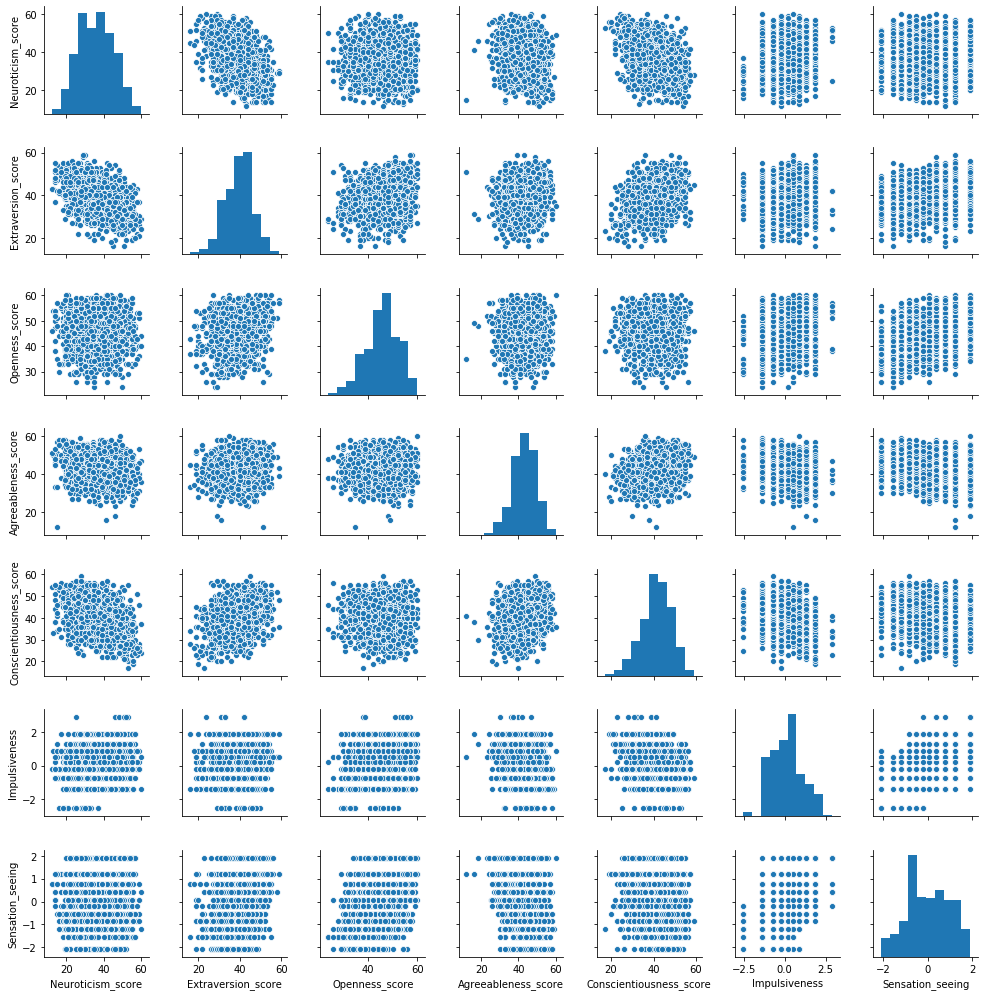

In [255]:
# Check pairplot of continuous variables
sns.pairplot(df.iloc[:, :12], size = 2)

In [12]:
# Check correlation of continuous variables
df.iloc[:, :12].corr() > .75

,Neuroticism_score,Extraversion_score,Openness_score,Agreeableness_score,Conscientiousness_score,Impulsiveness,Sensation_seeing
Neuroticism_score,True,False,False,False,False,False,False
Extraversion_score,False,True,False,False,False,False,False
Openness_score,False,False,True,False,False,False,False
Agreeableness_score,False,False,False,True,False,False,False
Conscientiousness_score,False,False,False,False,True,False,False
Impulsiveness,False,False,False,False,False,True,False
Sensation_seeing,False,False,False,False,False,False,True


In [13]:
# Dummy variables for categorical data columns
df = pd.get_dummies(df, columns = ['Age', 'Gender', 'Education_level', 'Country', 'Ethnicity'],
                                drop_first = True)

In [14]:
df.head()

,Neuroticism_score,Extraversion_score,Openness_score,Agreeableness_score,Conscientiousness_score,Impulsiveness,Sensation_seeing,Alcohol,Amphet,Amyl,...,Country_New Zealand,Country_Other,Country_UK,Country_USA,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,39,36,42,37,42,-0.21712,-1.18084,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,29,52,55,48,41,-0.71126,-0.21575,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,31,45,40,32,34,-1.37983,0.40148,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,34,34,46,47,46,-1.37983,-1.18084,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,43,28,43,41,50,-0.21712,-0.21575,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [15]:
df.columns

Index(['Neuroticism_score', 'Extraversion_score', 'Openness_score',
       'Agreeableness_score', 'Conscientiousness_score', 'Impulsiveness',
       'Sensation_seeing', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine',
       'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstacy', 'Heroin',
       'Ketamine', 'Legal_highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Semer_fake_drug', 'Volatile_substance_abuse', 'Age_25-34', 'Age_35-44',
       'Age_45-54', 'Age_55-64', 'Age_65+', 'Gender_Male',
       'Education_level_17', 'Education_level_18', 'Education_level_< 16',
       'Education_level_Associates degree', 'Education_level_Bachelors degree',
       'Education_level_Doctorate degree', 'Education_level_Masters degree',
       'Education_level_Some college', 'Country_Canada', 'Country_Ireland',
       'Country_New Zealand', 'Country_Other', 'Country_UK', 'Country_USA',
       'Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian',
       'Ethnicity_Mixed-White/Asian', 'Ethnicity_Mixe

In [16]:
# Reorder dataframe columns
df = df[['Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 'Gender_Male', 'Education_level_17',
    'Education_level_18', 'Education_level_< 16', 'Education_level_Associates degree',
    'Education_level_Bachelors degree', 'Education_level_Doctorate degree', 'Education_level_Masters degree',
    'Education_level_Some college', 'Country_Canada', 'Country_Ireland', 'Country_New Zealand', 'Country_Other',
    'Country_UK', 'Country_USA', 'Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian',
    'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White', 'Neuroticism_score', 'Extraversion_score',
    'Openness_score', 'Agreeableness_score', 'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing',
    'Semer_fake_drug', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine',
    'Crack', 'Ecstacy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine']]
df.head()

,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_Male,Education_level_17,Education_level_18,Education_level_< 16,Education_level_Associates degree,...,Cocaine,Crack,Ecstacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,1,0,1
2,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [17]:
# Create drug dataframe names for next step
df_names = [x + '_df' for x in list(df.columns)[34:]]
df_names

['Alcohol_df',
 'Amphet_df',
 'Amyl_df',
 'Benzos_df',
 'Caffeine_df',
 'Cannabis_df',
 'Chocolate_df',
 'Cocaine_df',
 'Crack_df',
 'Ecstacy_df',
 'Heroin_df',
 'Ketamine_df',
 'Legal_highs_df',
 'LSD_df',
 'Meth_df',
 'Mushrooms_df',
 'Nicotine_df']

In [18]:
# create dictionary with drug and drug specific dataframe
drug_dict = {}
for drug in df_names:
    drug_df = pd.DataFrame(df.iloc[:, :34]).merge(df[[drug[:-3]]], right_index = True, left_index = True)
    drug_dict[drug] = drug_df

In [208]:
# function to split dataframe into features and target
def get_x_y(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1:]
    y.columns = ['target']
    return X, y

In [103]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import itertools
import scikitplot as skplt

In [21]:
# function to apply standard scaling post train_test_split
def scaling(X_train, X_test):
    ss = StandardScaler()
    # Fit Transform and replace on X_train
    numeric_train = X_train.iloc[:, 26:33]
    X_train.drop(columns = ['Neuroticism_score', 'Extraversion_score', 'Openness_score', 'Agreeableness_score',
                            'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing'], inplace = True)
    scaled_train = pd.DataFrame(ss.fit_transform(numeric_train))
    scaled_train.columns = numeric_train.columns
    scaled_train.index = numeric_train.index
    X_train = X_train.merge(scaled_train, right_index = True, left_index = True)
    
    # Transform and replace on X_test
    numeric_test = X_test.iloc[:, 26:33]
    X_test.drop(columns = ['Neuroticism_score', 'Extraversion_score', 'Openness_score', 'Agreeableness_score',
                            'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing'], inplace = True)
    scaled_test = pd.DataFrame(ss.transform(numeric_test))
    scaled_test.columns = numeric_test.columns
    scaled_test.index = numeric_test.index
    X_test = X_test.merge(scaled_test, right_index = True, left_index = True)
    
    return X_train, X_test

In [22]:
# Function to apply SMOTE
def smote_train(X_train, y_train):
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
    return X_train_resampled, y_train_resampled

In [32]:
# Function to grid search for best C and penalty
def grid_search_CP(X_train, y_train):
    penalty = ['l1', 'l2']
    C = np.arange(.1, 50, .5)
    hyperparameters = dict(C = C, penalty = penalty)
    lr = LogisticRegression()
    clf = GridSearchCV(lr, hyperparameters, cv = 5, verbose = 0)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    grid = clf.fit(X_train_res, y_train_res)
    c = grid.best_estimator_.get_params()['C']
    p = grid.best_estimator_.get_params()['penalty']
    return c, p

In [225]:
# Function to fit Logistic Regression Model and predict on test set
def run_logreg(X_train, X_test, y_train, y_test, C, penalty):
    # Fit model and get predictions
    logreg = LogisticRegression(C = C, penalty = penalty, fit_intercept = False, solver = 'liblinear')
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_log = logreg.fit(X_train_res, y_train_res)
    y_hat_test = logreg.predict(X_test)
    
    # Print test data balances
    y_pos = y_test.target.value_counts()[1]
    drug_user_percent = round(y_pos/ len(y_test), 2)
    print(f'Drug user percent: {drug_user_percent * 100}%')
    
    # Calculate metrics
    print()
    print("Model Metrics:")
    print(f"Precision: {precision_score(y_test, y_hat_test)}")
    print(f"Recall: {recall_score(y_test, y_hat_test)}")
    print(f"Accuracy: {accuracy_score(y_test, y_hat_test)}")
    print(f"F1_Score: {f1_score(y_test, y_hat_test)}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    print()
    print(f'AUC: {auc(fpr, tpr)}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    return drug_user_percent

In [174]:
def logistic_modeling_steps(df):
    # Function to split dataframe into features and target
    X, y = get_x_y(df)
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    
    # Function to apply standard scaling post train_test_split
    X_train, X_test = scaling(X_train, X_test)
    
    # Function to grid search for best C and penalty
    C, P = grid_search_CP(X_train, y_train)
    
    # Function to fit Logistic Regression Model and predict on test set
    drug_user_percent = run_logreg(X_train, X_test, y_train, y_test, C, P)
    
    return drug_user_percent

In [176]:
drug_dict.keys()

dict_keys(['Alcohol_df', 'Amphet_df', 'Amyl_df', 'Benzos_df', 'Caffeine_df', 'Cannabis_df', 'Chocolate_df', 'Cocaine_df', 'Crack_df', 'Ecstacy_df', 'Heroin_df', 'Ketamine_df', 'Legal_highs_df', 'LSD_df', 'Meth_df', 'Mushrooms_df', 'Nicotine_df'])

Alcohol

Drug user percent: 96.0%

Model Metrics:
Precision: 0.9832869080779945
Recall: 0.7758241758241758
Accuracy: 0.7711864406779662
F1_Score: 0.8673218673218673


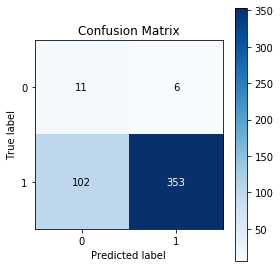


AUC: 0.7476405946994182


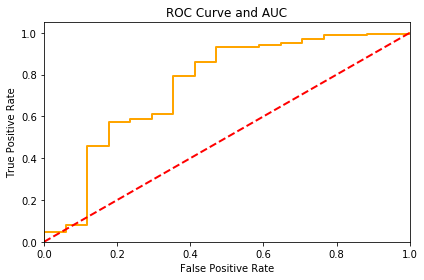

Amphet

Drug user percent: 33.0%

Model Metrics:
Precision: 0.5534883720930233
Recall: 0.7579617834394905
Accuracy: 0.7161016949152542
F1_Score: 0.6397849462365591


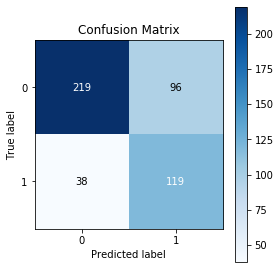


AUC: 0.8116671721767262


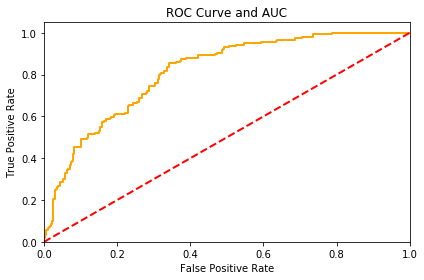

Amyl

Drug user percent: 21.0%

Model Metrics:
Precision: 0.37423312883435583
Recall: 0.61
Accuracy: 0.701271186440678
F1_Score: 0.46387832699619774


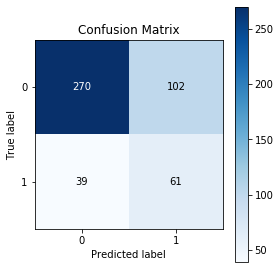


AUC: 0.7068010752688172


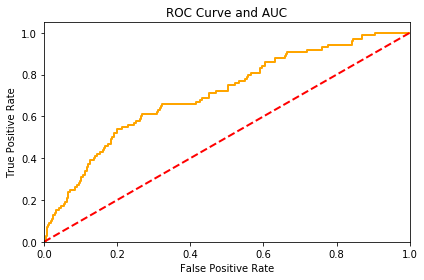

Benzos

Drug user percent: 41.0%

Model Metrics:
Precision: 0.6076555023923444
Recall: 0.6614583333333334
Accuracy: 0.6885593220338984
F1_Score: 0.6334164588528678


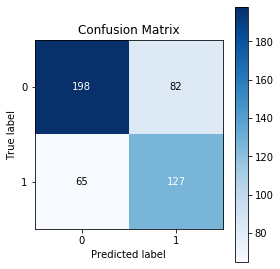


AUC: 0.7370535714285713


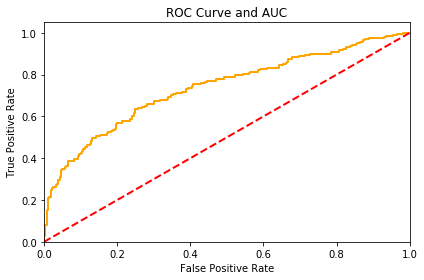

Caffeine

Drug user percent: 98.0%

Model Metrics:
Precision: 0.9818181818181818
Recall: 0.8199566160520607
Accuracy: 0.809322033898305
F1_Score: 0.8936170212765957


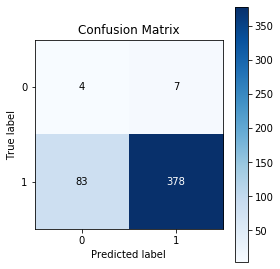


AUC: 0.6829027805166633


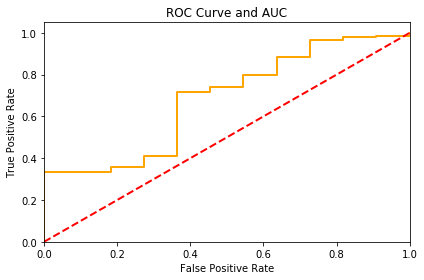

Cannabis

Drug user percent: 67.0%

Model Metrics:
Precision: 0.8928571428571429
Recall: 0.7886435331230284
Accuracy: 0.7944915254237288
F1_Score: 0.8375209380234506


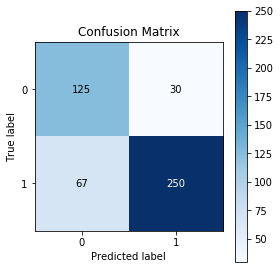


AUC: 0.8793935076829145


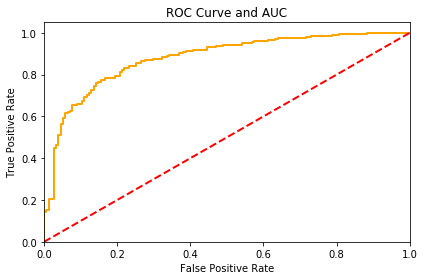

Chocolate

Drug user percent: 98.0%

Model Metrics:
Precision: 0.9782016348773842
Recall: 0.7770562770562771
Accuracy: 0.7648305084745762
F1_Score: 0.8661037394451145


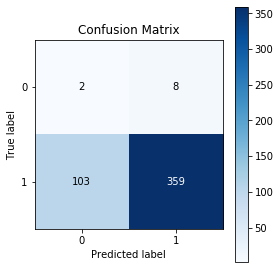


AUC: 0.5344155844155845


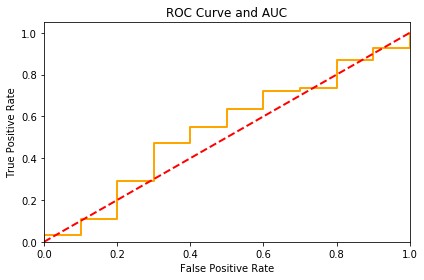

Cocaine

Drug user percent: 36.0%

Model Metrics:
Precision: 0.5394736842105263
Recall: 0.7321428571428571
Accuracy: 0.6822033898305084
F1_Score: 0.6212121212121212


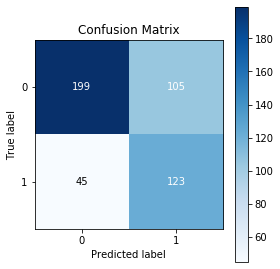


AUC: 0.7804472117794488


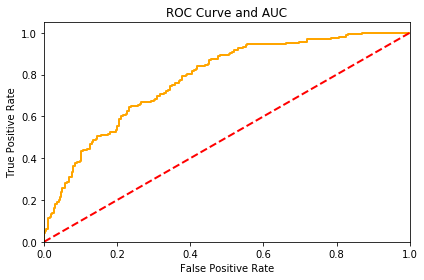

Crack

Drug user percent: 9.0%

Model Metrics:
Precision: 0.1678832116788321
Recall: 0.5476190476190477
Accuracy: 0.7182203389830508
F1_Score: 0.25698324022346364


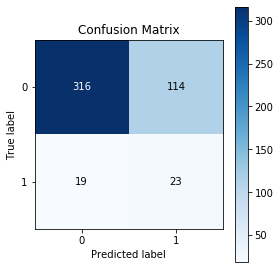


AUC: 0.7459025470653379


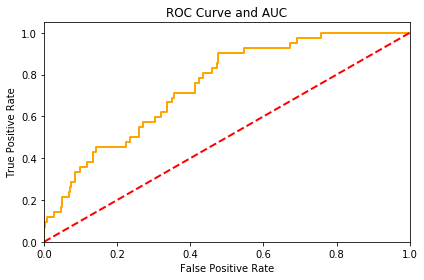

Ecstacy

Drug user percent: 38.0%

Model Metrics:
Precision: 0.6233766233766234
Recall: 0.8089887640449438
Accuracy: 0.7436440677966102
F1_Score: 0.7041564792176039


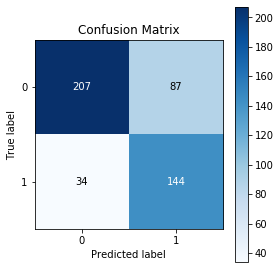


AUC: 0.8124665596575709


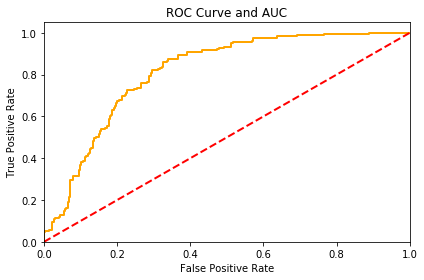

Heroin

Drug user percent: 10.0%

Model Metrics:
Precision: 0.2536231884057971
Recall: 0.7142857142857143
Accuracy: 0.7521186440677966
F1_Score: 0.3743315508021391


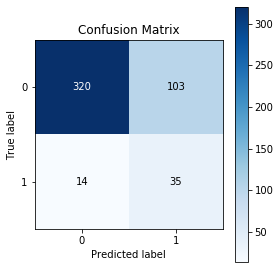


AUC: 0.8371206638683842


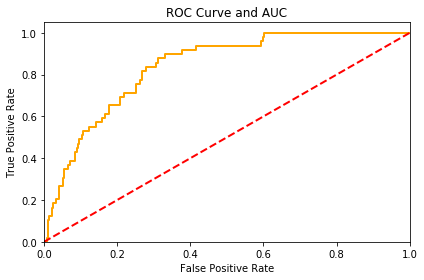

Ketamine

Drug user percent: 16.0%

Model Metrics:
Precision: 0.31746031746031744
Recall: 0.8
Accuracy: 0.6949152542372882
F1_Score: 0.45454545454545453


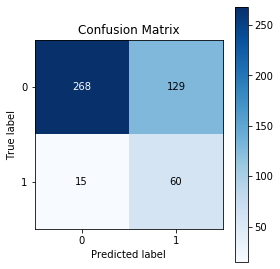


AUC: 0.7924769101595298


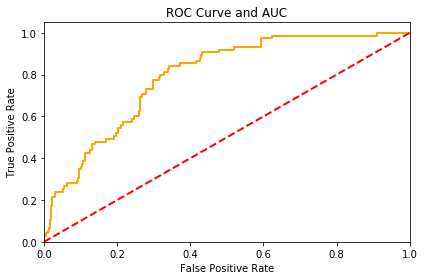

Legal_highs

Drug user percent: 42.0%

Model Metrics:
Precision: 0.7307692307692307
Recall: 0.7755102040816326
Accuracy: 0.788135593220339
F1_Score: 0.7524752475247524


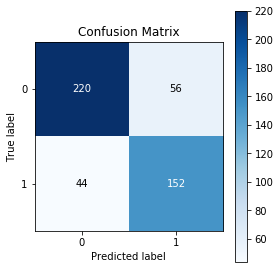


AUC: 0.8531869269446909


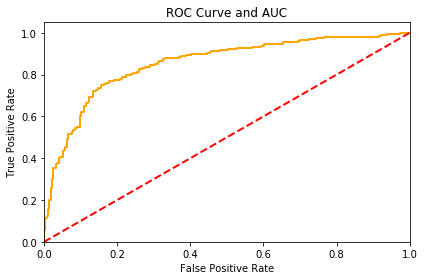

LSD

Drug user percent: 30.0%

Model Metrics:
Precision: 0.6117021276595744
Recall: 0.8156028368794326
Accuracy: 0.7902542372881356
F1_Score: 0.6990881458966565


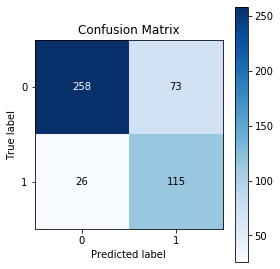


AUC: 0.8623984915686401


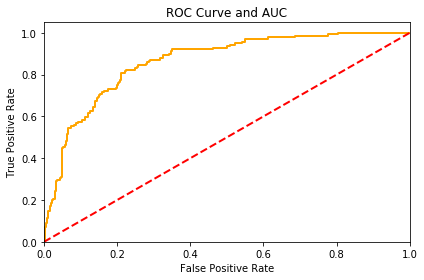

Meth

Drug user percent: 24.0%

Model Metrics:
Precision: 0.449438202247191
Recall: 0.6956521739130435
Accuracy: 0.7182203389830508
F1_Score: 0.5460750853242321


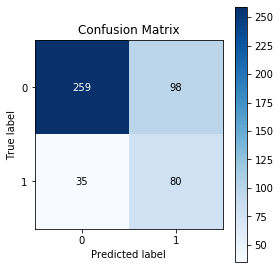


AUC: 0.7952015588844232


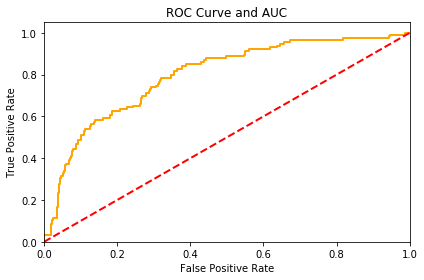

Mushrooms

Drug user percent: 39.0%

Model Metrics:
Precision: 0.6798029556650246
Recall: 0.7582417582417582
Accuracy: 0.7690677966101694
F1_Score: 0.7168831168831169


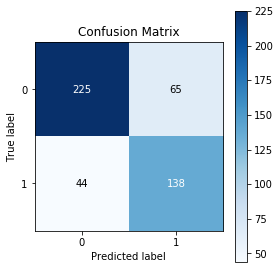


AUC: 0.8301629405077682


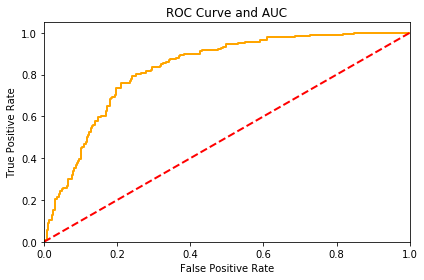

Nicotine

Drug user percent: 67.0%

Model Metrics:
Precision: 0.8241758241758241
Recall: 0.7120253164556962
Accuracy: 0.7055084745762712
F1_Score: 0.7640067911714771


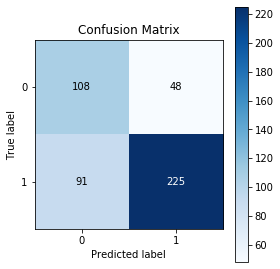


AUC: 0.7652345017851347


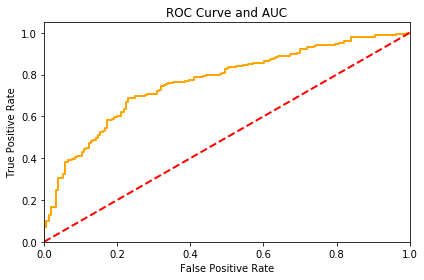

{'Alcohol': 0.96,
 'Amphet': 0.33,
 'Amyl': 0.21,
 'Benzos': 0.41,
 'Caffeine': 0.98,
 'Cannabis': 0.67,
 'Chocolate': 0.98,
 'Cocaine': 0.36,
 'Crack': 0.09,
 'Ecstacy': 0.38,
 'Heroin': 0.1,
 'Ketamine': 0.16,
 'Legal_highs': 0.42,
 'LSD': 0.3,
 'Meth': 0.24,
 'Mushrooms': 0.39,
 'Nicotine': 0.67}

In [226]:
# Function to run models and create dictionary with drug use percentages
drug_use_dict = {}
for key in drug_dict.keys():
    print(key[:-3])
    print()
    drug_user_percent = logistic_modeling_steps(drug_dict[key])
    drug_use_dict[key[:-3]] = drug_user_percent
drug_use_dict

In [227]:
total_drug_use_dict = {}
for key in drug_dict.keys():
    X, y = get_x_y(drug_dict[key])
    y_pos = y.target.value_counts()[1]
    drug_user_percent = round(y_pos/ len(y), 2)
    total_drug_use_dict[key[:-3]] = drug_user_percent
total_drug_use_dict

{'Alcohol': 0.96,
 'Amphet': 0.36,
 'Amyl': 0.2,
 'Benzos': 0.41,
 'Caffeine': 0.98,
 'Cannabis': 0.67,
 'Chocolate': 0.98,
 'Cocaine': 0.36,
 'Crack': 0.1,
 'Ecstacy': 0.4,
 'Heroin': 0.11,
 'Ketamine': 0.19,
 'Legal_highs': 0.4,
 'LSD': 0.3,
 'Meth': 0.22,
 'Mushrooms': 0.37,
 'Nicotine': 0.67}

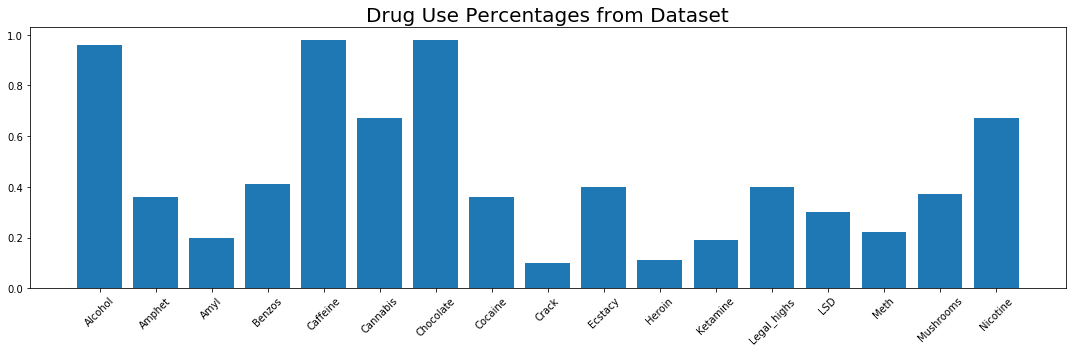

In [236]:
# Barplot of Drug Use Percentages
fig = plt.figure(figsize = (15,5))
plt.bar(range(len(total_drug_use_dict)), list(total_drug_use_dict.values()), align='center')
plt.xticks(range(len(total_drug_use_dict)), list(total_drug_use_dict.keys()), rotation = 45)
plt.title('Drug Use Percentages from Dataset', fontsize = 20)
plt.tight_layout()
plt.show()